# Classification

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X = mnist.data
y = mnist.target

In [3]:
type(mnist.target[0])

str

In [4]:
X.shape # 28 x 28 px = 784

(70000, 784)

In [5]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y.shape

(70000,)

We will graph an instance's feature vector. An instance here is an image of a digit stored as a row in the dataset.

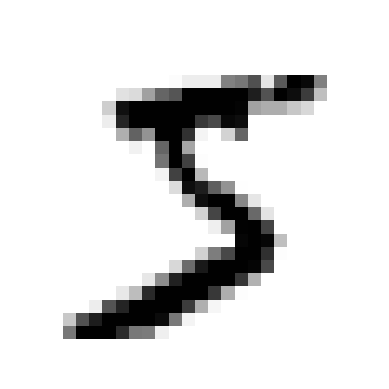

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

INDEX = 0

some_digit = np.array(X.iloc[INDEX])
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap="binary")
plt.axis('off')
plt.show()

In [8]:
y = y.astype(np.int8)

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Binary Classifier

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
print(y_train_5)

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool


### Stochastic Gradient Descent (SGD) Classifier

- can handle extremely large datasets

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [12]:
sgd_clf.predict([some_digit])

c:\Users\hursh\miniconda3\envs\tf2\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

## Performance Measures

### Cross Validation

Same as done before, in chapter 2

In [13]:
y_train_pred_original = sgd_clf.predict(X_train)

In [14]:
from sklearn.model_selection import cross_val_predict

# get a clean prediction in each iteration
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [15]:
# Implementation of Cross Validation

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    # creates a new, untrained model using the same hyperparameters as the original
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]
    X_test_folds = X_train.iloc[test_index]
    y_test_folds = y_train_5.iloc[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))



0.9669
0.91625
0.96785


In [16]:
from sklearn.metrics import confusion_matrix
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [17]:
from sklearn.metrics import precision_score, recall_score

prec = precision_score(y_train_5, y_train_pred)

In [18]:
rec = recall_score(y_train_5, y_train_pred)

In [19]:
f1 = 2/(1/prec + 1/rec)
f1

0.7325171197343847

In [20]:
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.7325171197343846


## Precision & Recall

**Precision** refers to "How many times were you right about a Positive?" This measures the *accuracy* of positive predictions. 

$$
\text{precision} = \frac{TP}{TP + FP}
$$

**Recall** refers to "How many positives could you recall correctly?". Also refers to *sensitivity* or *True Positive Rate* (TPR).  Another way to think about recall is how well you are able to **DETECT** the positives? Are you able to detect all of them or are there a few misses?

$$
\text{recall} = \frac{TP}{TP + FN}
$$

> Why do we need both precision and recall? 
>
> Think of it this way. If I correctly identified 10 positives, $TP = 10$. Say, I was very careful, so I didn't make any false positives, $FP = 0$ (e.g. never deem the innocent guilty even if it means you will have to let go of some criminals), so $FN \neq 0$.
> 
> This means our precision remains $100\%$ (careful to ensure there are no $FP$) but our recall would reduce, since we are letting some criminals go ($FN \neq 0$).

- Need high precision when its important not to have any False positives (mark as safe. Like 'safe for children' videos or 'safe for eating' or 'safe from virus' to allow someone into your house)
- Need high recall when its important to catch shoplifters, it will be more inconvenient but its more important to "GET ALL THE POSITIVES RIGHT", even when there are more false positives.

### Precision-Recall Tradeoff

Stochastic Gradient Descent has a decision function that gives a score to an X value. Based on a threshold, it classifies as positive or negative.

`sklearn` doesn't let us set the threshold value. But we have access to the decision score to make predictions. We can call the `decision_function()`

In [21]:
sgd_clf.decision_function([some_digit])

c:\Users\hursh\miniconda3\envs\tf2\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

How to decide which threshold to use?

In [22]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [23]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [24]:
thresholds

array([-106527.45300471, -105763.22240074, -105406.2965229 , ...,
         38871.26391927,   42216.05562787,   49441.43765905])

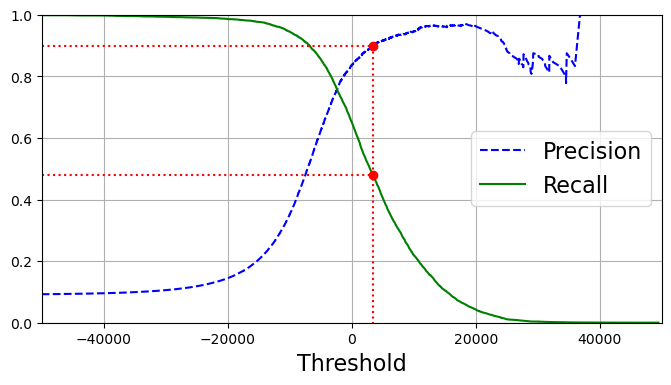

In [25]:

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])

plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
recall_90_precision = recalls[np.argmax(precisions > 0.9)]
thresholds_90_precision = thresholds[np.argmax(precisions > 0.9)]
plt.plot([-50000, thresholds_90_precision],[0.9, 0.9], 'r:')
plt.plot([thresholds_90_precision, thresholds_90_precision],[0.9,0.], 'r:')
plt.plot([-50000, thresholds_90_precision],[recall_90_precision,recall_90_precision], 'r:')
plt.plot([thresholds_90_precision],[0.9],'ro')
plt.plot([thresholds_90_precision],[recall_90_precision],'ro')
plt.show()

In [26]:
y_train_pred_90 = (y_scores >= thresholds_90_precision)
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.9000345901072293
0.4799852425751706


## The ROC Curve

> Receiver Operating Characteristic

Ratio of Positive instances correctly classified (as positive)
$$
\text{Recall/Sensitivity} = TPR = \dfrac{TP}{TP + FN} = \dfrac{TP}{\text{Total Actual Positives}}
$$
Ratio of Negative instances, incorrectly classified (as positive)
$$
FPR = \dfrac{FP}{TN + FP} = \dfrac{FP}{\text{Total Actual Negatives}}
$$
Ratio of Negative instances, correctly classified (as negative)
$$
\text{Specificity} = TNR = \dfrac{TN}{TN + FP} = \dfrac{TN}{\text{Total Actual Negatives}}
$$


> How to decide between ROC and PR?
> 
> If positive class is rare or when we care more about false positives than false negatives (e.g. Is a claim fradulent? Positive = fraudulant. In this case we will choose PR because both FP and FN are costly, but the primary concern is the class imbalance. Positive class is rare and *thus* we choose PR curves.)

Receiver Operating Characteristic - Area under the Curve (ROC AUC) is a metric used to compare different classifiers.
- Purely random: AUC = 0.5
- Perfect Classifier: AUC = 1.0

> `sklearn` classifiers generally have one or the other
> - `decision_function()`
> - `predict_proba()`

In [27]:
# ROC Curve plots sensitivity (recall) vs 1- specificity
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

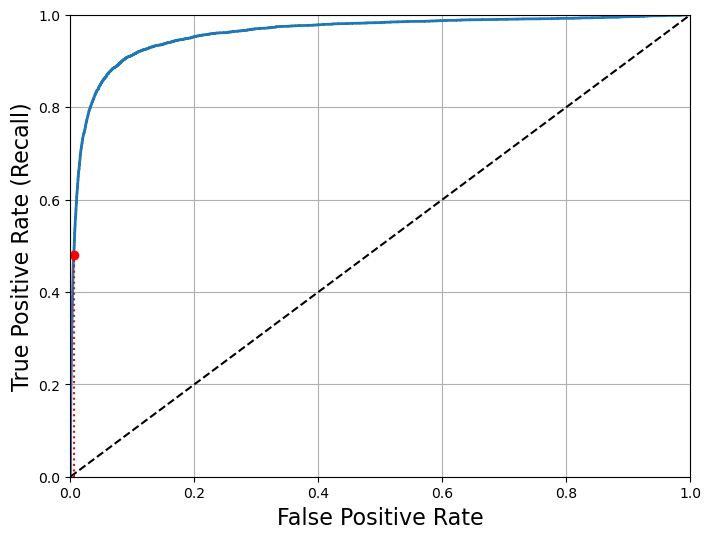

In [28]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth =2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate (Recall)", fontsize=16)
    plt.axis([0,1,0,1])
    plt.grid(True)

# we select the fpr with 90% Precision
plt.figure(figsize=(8,6))
fpr_90_precision = fpr[np.argmax(tpr >= recall_90_precision)]
plot_roc_curve(fpr, tpr)
plt.plot([fpr_90_precision,fpr_90_precision],[0, recall_90_precision],'r:')
plt.plot([fpr_90_precision],[recall_90_precision],'ro')
plt.show()

Both the ROC and the Precision-Recall curve give multiple values of fpr, tpr, precision, recall values at different threshold levels. So that we can plot them

The tradeoff in ROC is that the higher the recall (TPR), the higher the FPR.

A purely random classifier is represented by that dotted line

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

> How to decide between ROC and PR?
>
> If positive class is rare or when we care more about false positives than false negatives (e.g. Is a claim fradulent? Positive = fraudulant. In this case we will choose PR because both FP and FN are costly, but the primary concern is the class imbalance. Positive class is rare and *thus* we choose PR curves.)


Receiver Operating Characteristic - Area under the Curve (ROC AUC) is a metric used to compare different classifiers.

Purely random: AUC = 0.5

Perfect Classifier: AUC = 1.0

> `sklearn` classifiers generally have one or the other
> - `decision_function()`
> - `predict_proba()`

In [30]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [31]:
y_scores_forest = y_probas_forest[:, 1]
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [32]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

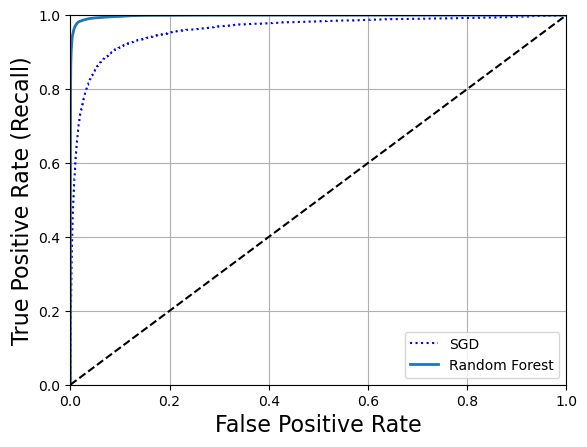

In [35]:
recall_90_precision_forest = tpr_forest[np.argmax(fpr_forest >= fpr_forest)]
plt.plot(fpr, tpr, 'b:', label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, label="Random Forest")
plt.legend(loc="lower right")
plt.show()

In [36]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [37]:
y_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
print(precision_score(y_train_5,y_pred_forest))
print(recall_score(y_train_5, y_pred_forest))

0.9905083315756169
0.8662608374838591


Just lost 4 hours of work because I refreshed the Colab notebook :/

In [38]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train.astype(np.float64))

In [39]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [40]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

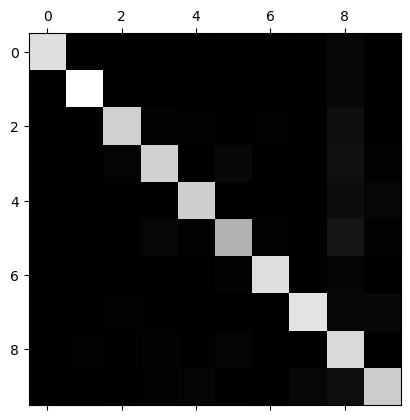

In [41]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [42]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

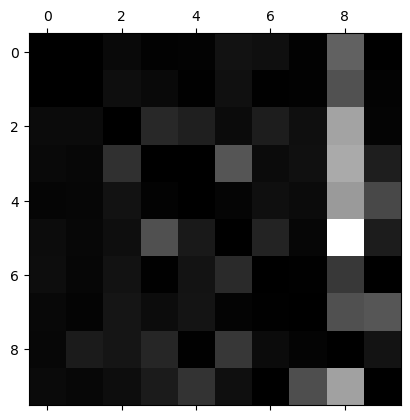

In [43]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()


## Multivariate Classification

There are multiple types of classifiers:
- SGD
- Random Forest Classifier
- Naive Bayes

These have native support for multiple classes. But there are others that don't like
- Support Vector Machine Classifiers (SVCs)
- Logistic Regressions

They are strictly binary in nature. However, we can use alternate strategies like `OvR` (One vs Rest) and `OvO` (One vs One) strategy in order to use these models for multivariate classification. Say, we have $N$ classes (each having $\frac{1}{N}$ portion in the data)
- `OvR` fits $N$ binary models. Each model checking for one (positive) and the rest (negative). So, on each model we have to fit 100% of the data.
- `OvO` fits $\dbinom{N}{2}$ binary models, $(0,1), (0,2)\dots(1,2),(1,3)\dots$ i.e. pairs of each class against others. Thus each model we have to fit contains only 20% of the data. But the number of models to be fit would be huge (e.g. 10 classes will require 45 models to be fit). So, this can be utilized by models that don't scale well with data. E.g. `SVC`s.

### Variations

- **Multiclass** can have multiple classes (e.g. 0,1,2,3...) for the singular label that is being predicted.
- **Multilabel**  can have multiple labels (each having a binary class)
- **Multioutput** is a generalization of multilabel where there are multiple labels and each label can have multiple classes.

In essence, every model is just a specification of a multioutput model.
$$
\text{Multilabel} + \text{Multiclass} = \text{Multioutput} 
$$

> The author shows an insane example for **multioutput** where he trains a model to remove the noise from a noisy digit using the `knn` classifier.


## Multilabel classification

In [44]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
knn_clf.predict([some_digit])

In [46]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)


### $F_{1}$ score

This is the harmonic mean of the precision and recall and gives more value to lower values. So, we get a higher $F_{1}$ score only when both precision and recall are higher
$$
F_{1} = \dfrac{2}{\dfrac{1}{\text{Precision}} + \dfrac{1}{\text{Recall}}}
$$
### Confusion Matrix

The confusion matrix gives a good idea about the accuracy of binary classifiers


In [47]:

from sklearn.metrics import confusion_matrix
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)


Each row represents actual class (Positive / Negative). Each column represents predicted class (+ / -)

In [48]:
from sklearn.metrics import f1_score

f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.976410265560605

## Multioutput Classification

Each label can be multiclass, each can have more than two possible values. In other words

$$
\text{Multilabel} + \text{Multiclass} = \text{Multioutput} 
$$